# Data Visualization - A Tutorial with Python (Part - I)

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Example 1: US Murders Data
murders = pd.read_csv('data/murders.csv')
murders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   State    51 non-null     object
 1   Region   51 non-null     object
 2   Pop      51 non-null     int64 
 3   Murders  51 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [3]:
murders.head()

State Region       Pop  Murders
0    AL  South   4779736      135
1    AK   West    710231       19
2    AZ   West   6392017      232
3    AR  South   2915918       93
4    CA   West  37253956     1257

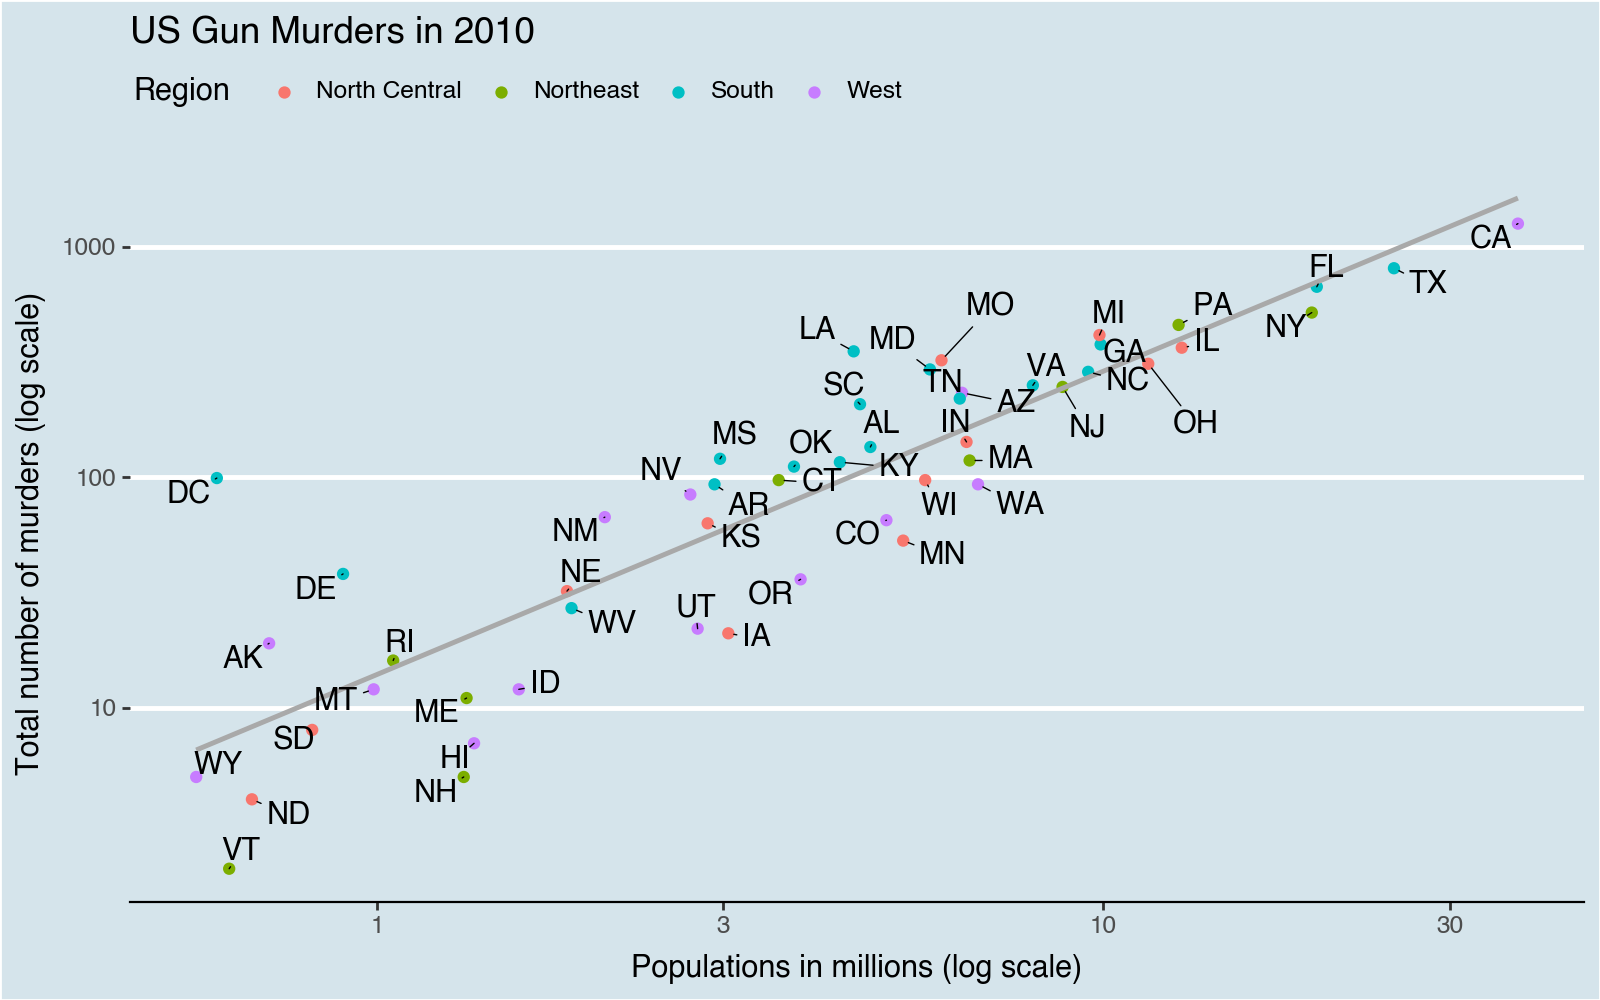

In [4]:
#load the required ggplot functions from plotnine
from plotnine import (ggplot, aes, geom_point, scale_x_log10, scale_y_log10, geom_text, geom_smooth, theme,
                    xlab,ylab,ggtitle, scale_color_discrete, element_text, element_rect, element_line, element_blank)

murders['Population'] = murders['Pop']/(10**6) #Population in millions

#Create the plot with layers

( ggplot(murders, aes(x='Population', y='Murders',label='State')) + geom_point( aes(color='Region'))+
 geom_smooth(aes(x='Population', y='Murders'),  inherit_aes=False, method='lm',se=False,color="darkgray")+
 xlab("Populations in millions (log scale)") + 
 ylab("Total number of murders (log scale)") +
 ggtitle("US Gun Murders in 2010") +
 scale_color_discrete(name = "Region") +
 scale_x_log10() + scale_y_log10() + 
 geom_text(adjust_text={'arrowprops':dict(arrowstyle="-", lw=0.5), 'min_arrow_len':7}) +
 theme(plot_title = element_text(ha='left', face='bold'),legend_position='top', rect=element_rect(fill="#d5e4eb"), 
       panel_grid_major_y = element_line(colour = "white", size = 1.75),
       axis_line = element_line(size = 0.8),
       axis_line_y = element_blank(),
       axis_ticks_major = element_line(),
       axis_ticks_y = element_blank(),
       panel_grid_minor = element_blank(),  panel_grid_major_x = element_blank(),  panel_border = element_blank(), 
       legend_justification=0, figure_size=(8,5))
)

In [5]:
#Example 2: US Contagious Diseases Data
us_contagious_diseases = pd.read_csv('./data/us_contagious_diseases.csv')
us_contagious_diseases.head()

disease    state  year  weeks_reporting  count  population
0  Hepatitis A  Alabama  1966               50    321   3345787.0
1  Hepatitis A  Alabama  1967               49    291   3364130.0
2  Hepatitis A  Alabama  1968               52    314   3386068.0
3  Hepatitis A  Alabama  1969               49    380   3412450.0
4  Hepatitis A  Alabama  1970               51    413   3444165.0

In [6]:
the_disease = "Measles"
index = (~ us_contagious_diseases['state'].isin(["Hawaii", "Alaska"])) & (us_contagious_diseases.disease==the_disease)
dat = us_contagious_diseases.loc[index,:].copy() 
dat['rate'] = dat['count'] / dat['population'] * 10000. * 52. / dat['weeks_reporting']
dat = dat.sort_values('rate')
#dat

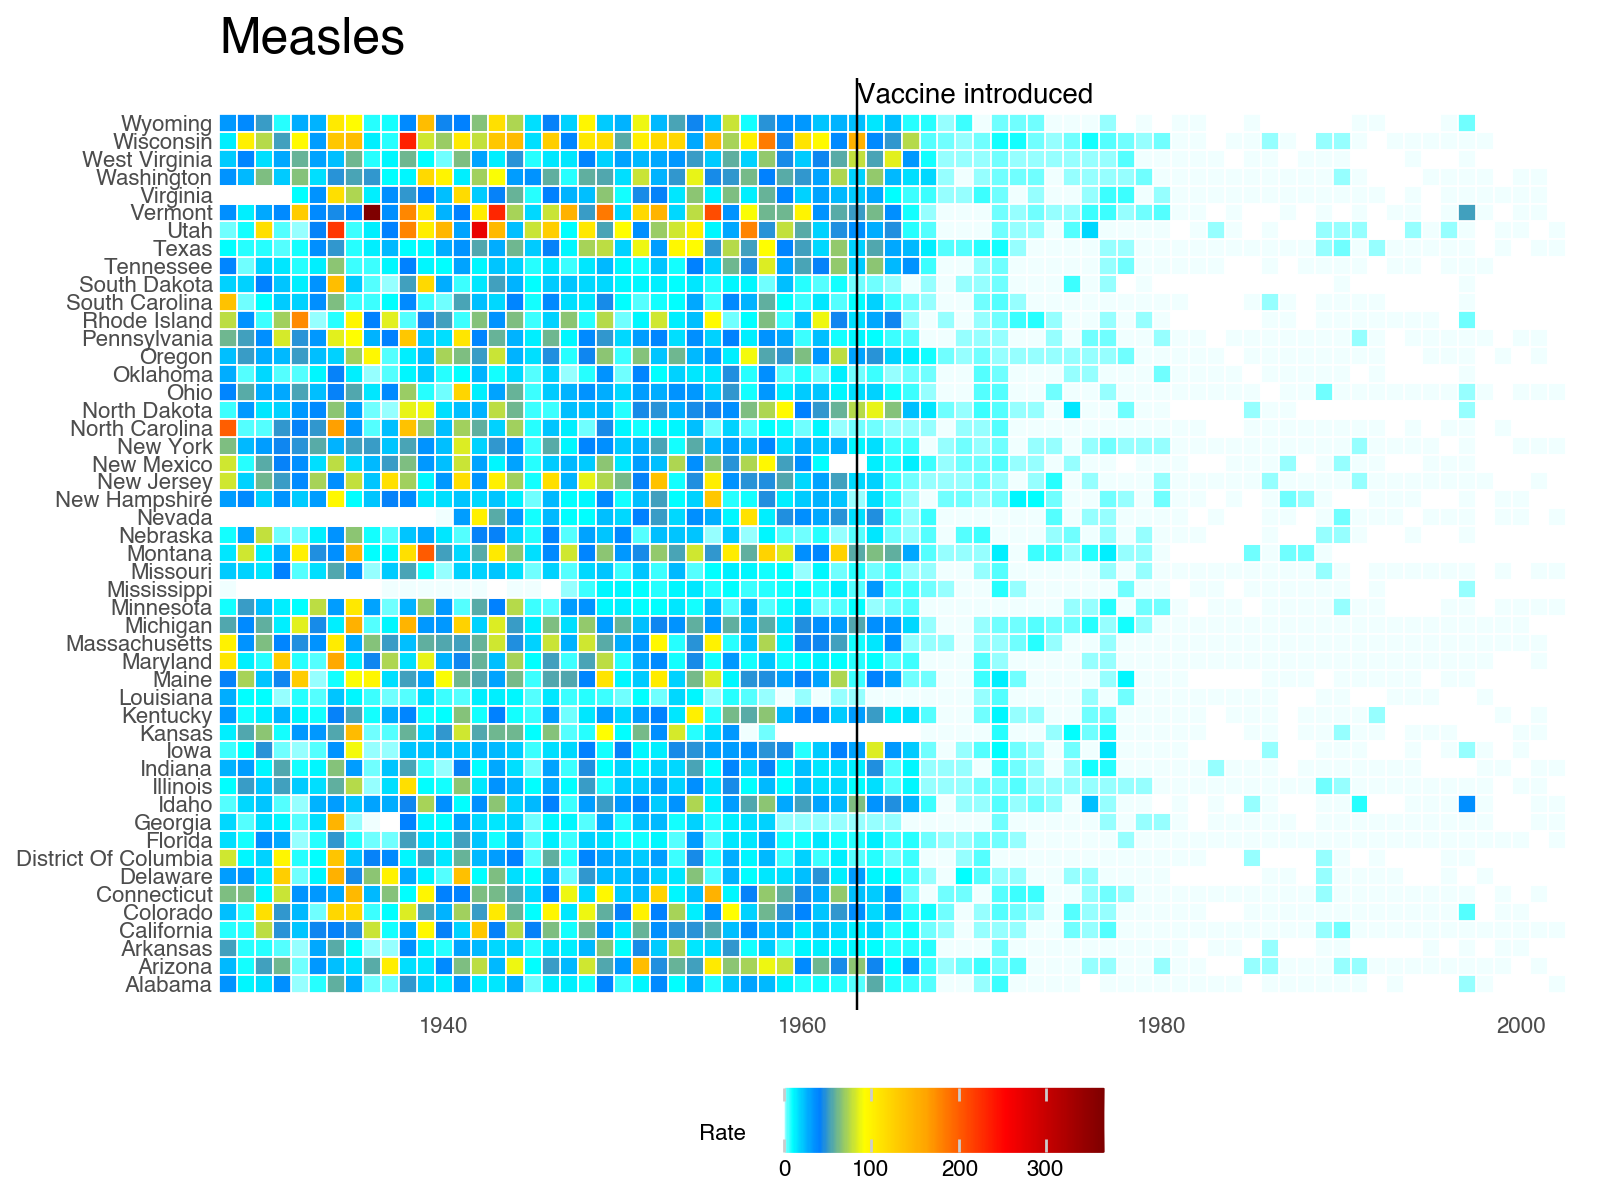

In [7]:
from plotnine import (geom_tile, scale_x_continuous, scale_y_discrete, scale_fill_gradientn, geom_vline, theme_minimal, coord_cartesian, labs,annotate)
from matplotlib import colormaps
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
jet_colors = LinearSegmentedColormap.from_list('my_jet', ["#F0FFFF", "cyan", "#007FFF", "yellow",  "orange","red", "#7F0000"], gamma=0.5)

( ggplot(dat, aes(x='year', y='state', fill = 'rate')) +
  geom_tile(color = "white", size = 0.35) +
  scale_x_continuous(expand = (0,0)) +
  scale_y_discrete(expand = (0,1)) +
  scale_fill_gradientn(colors = jet_colors(range(256)), na_value = 'white') +
  geom_vline(xintercept = 1963, color = "black") +
  theme_minimal() + 
  theme(panel_grid = element_blank()) +
  coord_cartesian() +
  labs(title=the_disease) +
  ylab("") +
  xlab("") +  labs(fill = "Rate")+
  theme(plot_title = element_text(ha='left', size=18, weight='bold'),legend_position = "bottom", text = element_text(size = 8),  figure_size=(8,6)) + 
  annotate(geom = "text", x = 1963, y = 50.5, label = "Vaccine introduced", size = 10, ha = 'left')
)

/Users/bimanc/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:372: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.


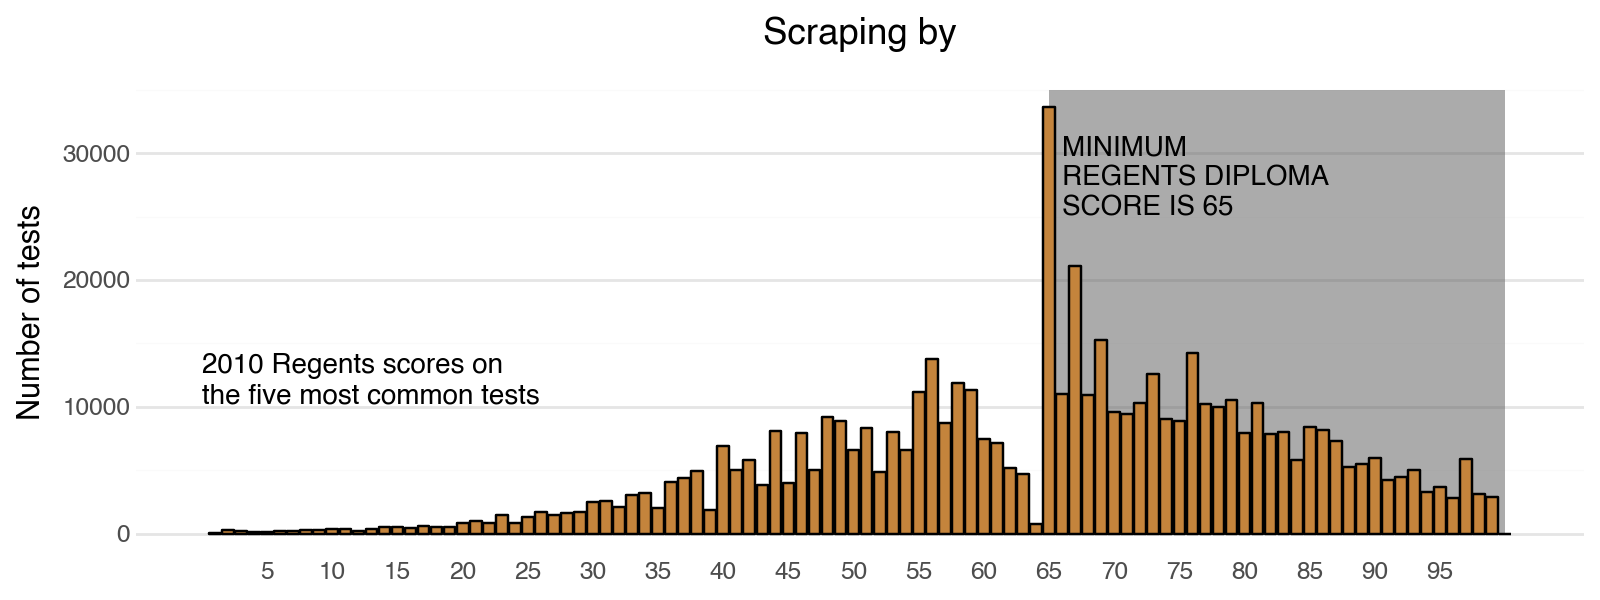

In [8]:
#Example 3: NYC Regents score data
from plotnine import geom_bar

exdata = pd.read_csv('./data/nyc_regents_scores.csv')
exdata['total'] = exdata.iloc[:,1:].sum(axis=1)
exdata = exdata[~exdata.score.isna()]

( ggplot(exdata, aes('score', 'total')) + 
  annotate("rect", xmin = 65, xmax = 100, ymin = 0, ymax = 35000, alpha = .5) +
  geom_bar(stat = "identity", color = "black", fill = "#C4843C") + 
  annotate("text", x = 66, y = 28000, label = "MINIMUM\nREGENTS DIPLOMA\nSCORE IS 65", ha = 'left', size = 10) +
  annotate("text", x = 0, y = 12000, label = "2010 Regents scores on\nthe five most common tests", 
           ha = 'left', size = 10) +
  scale_x_continuous(breaks = np.arange(5, 100, 5), limits = [0,101]) + 
  ggtitle("Scraping by") + 
  xlab("") + ylab("Number of tests") + 
  theme_minimal() + 
  theme(panel_grid_major_x = element_blank(), 
        panel_grid_minor_x = element_blank(),
        axis_ticks_length = -2,
        plot_title = element_text(weight = "bold"), figure_size=(8,3))
)

In [9]:
#Example 4: Gapminder data
gapminder = pd.read_csv('./data/gapminder.csv')
west = ["Western Europe","Northern Europe","Southern Europe",
          "Northern America","Australia and New Zealand"]
gapminder['group'] = gapminder['region'].case_when([(gapminder['region'].isin(west),"The West"),
                                                   (gapminder['region'].isin(["Eastern Asia", "South-Eastern Asia"]),"East Asia"),
                                                   (gapminder['region'].isin(["Caribbean", "Central America", "South America"]), "Latin America"),
                                                   ((gapminder['region']!="Northern Africa")&(gapminder['continent']=="Africa"), "Sub-Saharan Africa"),
                                                   (np.ones(gapminder['region'].shape,dtype=bool), "Others")]).astype("category")
                                                   


In [10]:
from plotnine.animation import PlotnineAnimation
from plotnine import (guides, scale_size_continuous, scale_fill_manual, scale_color_manual)

from matplotlib import rc

rc("animation", html="jshtml")

years = range(1960, 2016)
indx = (gapminder['year'].isin(years)) & (~ gapminder['group'].isna()) & (~ gapminder['fertility'].isna()) & (~ gapminder['life_expectancy'].isna())

gapminder2 = gapminder.loc[indx,:].copy()
gapminder2['population_in_millions'] = gapminder2['population']/(1e+06)

#Define the plotting function for a year
def plot(year):
    pdata = gapminder2.loc[gapminder2.year==year,:].copy()
    ptitle = "Year "+str(year)
    p = (ggplot(pdata, aes(x='fertility', y = 'life_expectancy', color='group',fill = 'group', size = 'population_in_millions')) +
         geom_point(alpha = 0.8) + theme(legend_title = element_blank()) +
         coord_cartesian(ylim = [30, 85], xlim = [0, 10]) + labs(x = 'Fertility rate (births per woman)', 
                                                                 y = 'Life expectancy')+ 
         scale_size_continuous(limits=[0, 1500], guide=None)+
         scale_fill_manual(values={'Others': 'black','Sub-Saharan Africa': 'red', 'The West':'green',
                                  'Latin America': 'purple', 'East Asia': 'yellow'}, drop=False, guide=None) +
         scale_color_manual(values={'Others': 'black','Sub-Saharan Africa': 'red', 'The West':'green',
                                  'Latin America': 'purple', 'East Asia': 'yellow'}, drop=False,guide='legend')+
         annotate(geom='text',x=5.0, y=85.0, label=f'Year: {year}', size=12)
        )
    return p

#Generate the plots for all years
plots = (plot(year) for year in years)

#create the animation
ani=PlotnineAnimation(plots, interval=200, repeat_delay=500)
ani
